# 2021113451 税航宇

## 练习1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [3]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

In [4]:
arrIndex = np.array(X).argsort()
X = X[arrIndex]
Y = Y[arrIndex]

In [5]:
print(X)
print(Y)

[-1.49329364 -0.68388789 -0.46819526 -0.45270204 -0.31604016 -0.26400365
  0.02362673  0.06549472  0.08898416  0.19722004  0.2456922   0.5114847
  0.59424455  0.70846042  0.77026309  1.01993764  1.03780474  1.08334621
  1.24112288  1.75634392]
[-1.2855133   3.5737603  -0.9861325  -0.15686681  2.62078689 -1.30408343
  2.36963799  4.01600211 -0.20329642  5.47930021  2.84796441  2.27915787
  3.07728831  4.49682518  5.38341441  6.24385669  7.93568197  3.58719009
  4.39242028  6.00822241]


### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [6]:
# 划分训练集和测试集
X_train = X[:15]
Y_train = Y[:15]
X_test = X[15:]
Y_test = Y[15:]

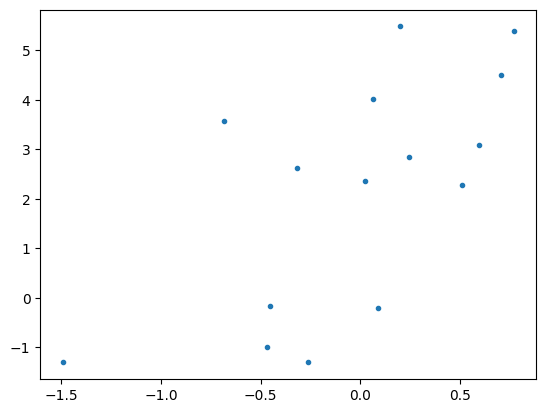

In [7]:
plt.plot(X_train, Y_train, '.')

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好?

In [8]:
def cal_coefficients(X, Y, n):
    """
    计算多项式系数。
    """
    rows = [X**i for i in reversed(range(n))] # 由ndarray构成的列表
    A = np.vstack(rows).T # 上下拼接成一个矩阵
    theta = np.linalg.solve(A.T@A, A.T@Y) # 计算系数的公式
    return theta

In [9]:
def cal_predictions(X, theta):
    """
    计算预测值。
    """
    n = len(theta)
    degrees = reversed(range(n))

    Y = np.zeros_like(X)
    for w, d in zip(theta, degrees): # 高次幂系数在前，低次幂系数在后
        Y += w * X**d # 从高次幂向低次幂计算
    return Y

In [10]:
def cal_MSE(Y_originality, Y_prediction):
    """
    计算均方差。
    """
    error = Y_originality - Y_prediction
    mean_square_error = pow(np.dot(error, error) / len(Y_originality), 0.5)
    return mean_square_error

In [11]:
# 使函数曲线更加平滑，在绘制的图片上更加美观
def smooth_xy(X, Y):
    """
    利用插值法对折线进行平滑处理。
    """
    X_smooth = np.linspace(X.min(), X.max(), 100)
    Y_smooth = make_interp_spline(X, Y)(X_smooth)
    return X_smooth, Y_smooth

degree = 1, theta = [2.53947056 2.22723541], MSE = 1.7462010282210094
degree = 2, theta = [0.57562669 2.82785647 2.04009731], MSE = 1.7266371413790589
degree = 3, theta = [0.75868353 1.34597137 2.31902825 1.89880445], MSE = 1.7171132879202617
degree = 4, theta = [-4.33263277 -4.13079552  4.95793528  4.05789639  1.59869044], MSE = 1.676028520575709


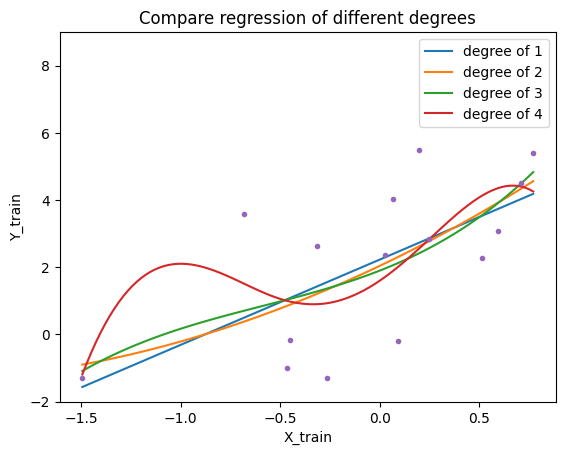

In [12]:
Theta = []
for n in range(2, 6):
    theta = cal_coefficients(X_train, Y_train, n)
    Theta.append(theta)
    Y_prediction = cal_predictions(X_train, theta)
    mean_square_error = cal_MSE(Y_train, Y_prediction)
    print("degree = {}, theta = {}, MSE = {}".format(n-1, theta, mean_square_error))
    X_smooth, Y_smooth = smooth_xy(X_train, Y_prediction)
    plt.plot(X_smooth, Y_smooth, label="degree of {}".format(n-1))
    
plt.plot(X_train, Y_train, '.')
plt.title("Compare regression of different degrees")
plt.ylim(-2, 9)
plt.legend()
plt.xlabel("X_train")
plt.ylabel("Y_train");

[4.81733702 4.86271    4.97836122 5.37903043 6.68741909]
degree = 4, MSE = 1.7232631801407496
[5.52314334 5.59483236 5.77922283 6.43650197 8.78244678]
degree = 4, MSE = 2.1297231262815086
[ 6.46921942  6.60318914  6.9554332   8.30077641 14.23424241]
degree = 4, MSE = 4.384382280199798
[  1.8236333    1.50675439   0.59360096  -3.90554018 -39.58820236]
degree = 4, MSE = 21.06048983197963


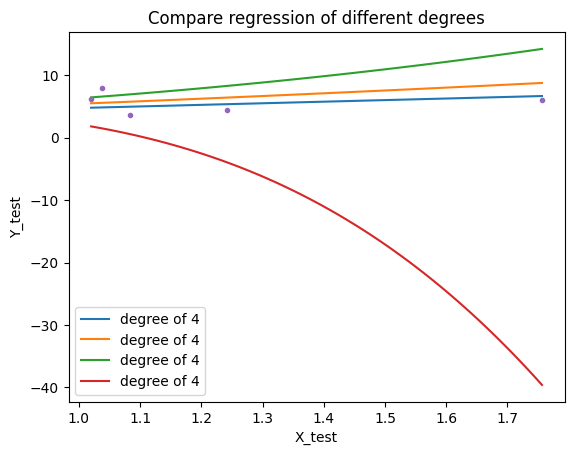

In [13]:
for theta in Theta:
    Y_test_prediction = cal_predictions(X_test, theta)
    print(Y_test_prediction)
    mean_square_error_test = cal_MSE(Y_test, Y_test_prediction)
    print("degree = {}, MSE = {}".format(n-1, mean_square_error_test))
    X_test_smooth, Y_test_smooth = smooth_xy(X_test, Y_test_prediction)
    plt.plot(X_test_smooth, Y_test_smooth, label="degree of {}".format(n-1))

plt.plot(X_test, Y_test, '.')
plt.title("Compare regression of different degrees")
plt.ylim()
plt.legend()
plt.xlabel("X_test")
plt.ylabel("Y_test");

In [14]:
print("4次多项式函数与训练数据拟合最好。")

4次多项式函数与训练数据拟合最好。


### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

degree = 1, MSE = 1.7232631801407496
degree = 2, MSE = 2.1297231262815086
degree = 3, MSE = 4.384382280199798
degree = 4, MSE = 21.06048983197963


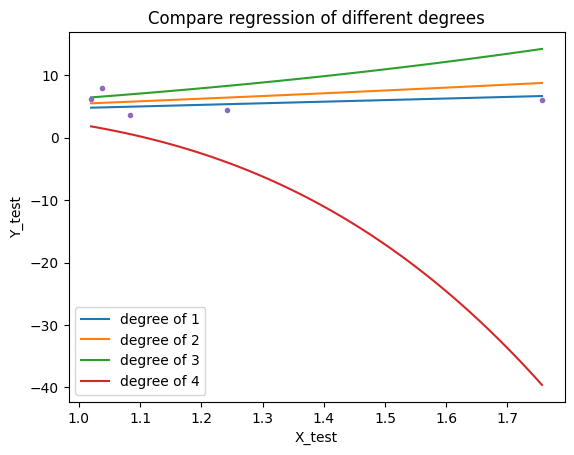

In [15]:
n = 2
for theta in Theta:
    Y_test_prediction = cal_predictions(X_test, theta)
    mean_square_error_test = cal_MSE(Y_test, Y_test_prediction)
    print("degree = {}, MSE = {}".format(n-1, mean_square_error_test))
    X_test_smooth, Y_test_smooth = smooth_xy(X_test, Y_test_prediction)
    plt.plot(X_test_smooth, Y_test_smooth, label="degree of {}".format(n-1))
    n += 1

plt.plot(X_test, Y_test, '.')
plt.title("Compare regression of different degrees")
plt.ylim()
plt.legend()
plt.xlabel("X_test")
plt.ylabel("Y_test");

In [16]:
print("1次多项式函数与测试数据拟合最好。")

1次多项式函数与测试数据拟合最好。


1.2和1.3的答案是否相同？两者的异同有什么意义？

In [17]:
print("不相同，表明4次多项式函数出现了过拟合现象。")

不相同，表明4次多项式函数出现了过拟合现象。


## 练习2

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

$$ ReLU(x) = \begin{cases}
0 & x \leqslant 0 \\
x & x > 0
\end{cases}$$

$$sigmoid(x) =\frac{1}{1+e^{-x}}$$

<font face='SimHei'>
<font size="5">
前向传播
<font face='SimSun'>
<font size="3">
$$z={{w}_{1}}\cdot {{x}_{1}}+{{w}_{2}}\cdot {{x}_{2}}+{{w}_{3}}\cdot {{x}_{3}}+b=\left[ \begin{matrix}
   {{w}_{1}} & {{w}_{2}} & {{w}_{3}}  \\
\end{matrix} \right]\left[ \begin{matrix}
   {{x}_{1}}  \\
   {{x}_{2}}  \\
   {{x}_{3}}  \\
\end{matrix} \right]+b$$
&emsp;&emsp;若激活函数为`sigmoid`函数，则
$$a=sigmoid(z)$$
<br>
<br>
<font face='SimHei'>
<font size="5">
损失函数
<font face='SimSun'>
<font size="3">
$$J(w,b)=-[y\log (a)+(1-y)\log (1-a)]$$
<br>
<br>
<font face='SimHei'>
<font size="5">
偏导数
<font face='SimSun'>
<font size="3">
$$\frac{\partial J}{\partial w}=\frac{\partial J}{\partial a}\cdot \frac{\partial a}{\partial z}=-(\frac{y}{a}+\frac{y-1}{1-a})a(a-1)=(a-y)x^T$$
<br>
<br>
<font face='SimHei'>
<font size="5">
更新参数
<font face='SimSun'>
<font size="3">
$$w = w-\alpha*\frac{\partial J}{\partial w}$$  
$$b = b-\alpha*\frac{\partial J}{\partial b}$$

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [18]:
import numpy as np
import torch

dtype = torch.float

In [19]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

In [20]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [21]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [22]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [23]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [24]:
b2 = np.array([[0.277288]])

In [25]:
X = torch.tensor(X, dtype=dtype)
Y = torch.tensor(Y, dtype=dtype)
W1 = torch.tensor(W1, dtype=dtype, requires_grad=True)
W2 = torch.tensor(W2, dtype=dtype, requires_grad=True)
b1 = torch.tensor(b1, dtype=dtype, requires_grad=True)
b2 = torch.tensor(b2, dtype=dtype, requires_grad=True)

In [26]:
def sigmoid(x):
    """设置激活函数。"""
    return 1 / (1 + torch.exp(-x))

In [27]:
def forward(W1, W2, b1, b2, X):
    """前向传播。"""
    a1 = torch.mm(X, W1) + b1
    Z1 = sigmoid(a1)
    a2 = torch.mm(Z1, W2) + b2
    y = a2
    return y

In [28]:
Y_prediction = forward(W1, W2, b1, b2, X)
print(Y_prediction)

tensor([[2.1851],
        [1.3508],
        [2.0997],
        [1.9834]], grad_fn=<AddBackward0>)


In [29]:
loss_fn = torch.nn.MSELoss(reduction='sum')
loss = loss_fn(Y_prediction, Y)
print("L的值为：{}".format(loss))

L的值为：11.227556228637695


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [30]:
loss.requires_grad_(True)
loss.backward()

In [31]:
print("W1.grad: \n{}\n".format(W1.grad))
print("b1.grad: \n{}\n".format(b1.grad))
print("W2.grad: \n{}\n".format(W2.grad))
print("b2.grad: \n{}\n".format(b2.grad))

W1.grad: 
tensor([[-0.4025, -0.0018,  0.0491, -0.5155, -0.1874],
        [ 0.6442, -0.0111,  0.8137,  0.2788,  0.5732]])

b1.grad: 
tensor([ 1.8136, -0.0273,  2.1717,  1.4389,  2.1092])

W2.grad: 
tensor([[4.8222],
        [5.3407],
        [2.6462],
        [9.7043],
        [4.2573]])

b2.grad: 
tensor([[11.7448]])

